# Split dataset into different `PROPERTY_TYPE`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from helpers.data import summary
from helpers import constants as C

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
main_df = pd.read_csv("data/processed/gurgaon_10k.csv").sort_values("PRICE", ignore_index=True)
print(main_df.shape)
main_df.head()

(10162, 33)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRANSPORATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,FEATURES_SCORE
0,70480214,j70480214,gurgaon,5500.0,15.0,350.0,3.0,1 bhk flat in sector 107 gurgaon,very much demanding property at dwarka express...,residential apartment,Unfurnished,North-East,1-5 Year Old Property,<15,1.0,signature global solera 2,2.0,<15,28.512525,76.973543,1.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1.0,0.0,0.0,0.0,0.0,2.0,86,44
1,70794112,u70794112,gurgaon,7000.0,10.0,700.0,15.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,Semifurnished,East,1-5 Year Old Property,<15,1.0,rof ananda,1.0,<15,28.484814,77.080853,1.0,sector 95 gurgaon,rof ananda,rof ananda,218,3.0,0.0,0.0,0.0,0.0,12.0,63,43
2,70607360,o70607360,gurgaon,7500.0,14.0,514.0,3.0,2 bhk flat in sector 107 gurgaon,cheap rent and best place and location at dwar...,residential apartment,Unfurnished,North-East,0-1 Year Old Property,<15,2.0,signature global solera 2,1.0,<15,28.512525,76.973543,2.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1.0,0.0,0.0,0.0,0.0,2.0,76,58
3,69621256,s69621256,gurgaon,8500.0,8.0,980.0,3.0,2 bhk flat in sector 95 gurgaon,find this 2 bhk apartment for rent in sector 9...,residential apartment,Unfurnished,North,1-5 Year Old Property,<15,2.0,ramsons kshitij,1.0,<15,28.416679,76.902677,2.0,sector 95 gurgaon,ramsons kshitij,ramsons kshitij,NaN,0.0,0.0,0.0,0.0,3.0,0.0,99,67
4,70794066,j70794066,gurgaon,8500.0,8.0,980.0,3.0,2 bhk flat in sector 95 gurgaon,"ramsons kshitij , sector 95, near to wazirpur ...",residential apartment,Semifurnished,East,1-5 Year Old Property,<15,2.0,ramsons kshitij,1.0,<15,28.416679,76.902677,2.0,sector 95 gurgaon,ramsons kshitij,ramsons kshitij,512,0.0,0.0,0.0,0.0,3.0,0.0,77,51


In [4]:
main_df["PROP_ID"].duplicated().sum()

0

In [5]:
main_df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRANSPORATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE', 'FEATURES_SCORE'],
      dtype='object')

In [6]:
main_df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
farm house                    120
serviced apartments            10
Name: count, dtype: int64

### Important functions

In [7]:
def boxplot(df: pd.DataFrame) -> None:
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(x=df["PRICE"], ax=ax1, color=C.LIGHT_GREEN)
    sns.boxplot(x=df["AREA"], ax=ax2, color=C.SKY_BLUE)

    plt.tight_layout()
    plt.show()

In [8]:
# Copy main_df into df to work upon
df = main_df.copy(True)

## General Step - Start

In [9]:
drop_cols = [
    "SPID",
    "TOTAL_LANDMARK_COUNT",
    "LATITUDE",
    "LONGITUDE",
    "FACING",
    "AGE",
    "BHK_BED",
    "FLOOR_NUM",
    "TOTAL_FLOOR",
    "BALCONY_NUM",
    "FURNISH",
    "LOCALITY_NAME",
    "BUILDING_NAME",
    "SOCIETY_NAME",
    "ADDRESS",
    "TRANSPORATION",
    "ACCOMODATION",
    "LEISURE",
    "EDUCATION",
    "HEALTH",
    "OTHER",
    "AMENITIES_SCORE",
    "FEATURES_SCORE",
]
drop_index = df.query("PROPERTY_TYPE==['farm house', 'serviced apartments']").index
df = df.drop(columns=drop_cols, index=drop_index, errors="ignore").reset_index(drop=True)

print(df.shape)
df.head()

(10032, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,j70480214,gurgaon,5500.0,15.0,350.0,1 bhk flat in sector 107 gurgaon,very much demanding property at dwarka express...,residential apartment,1.0,signature global solera 2
1,u70794112,gurgaon,7000.0,10.0,700.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,1.0,rof ananda
2,o70607360,gurgaon,7500.0,14.0,514.0,2 bhk flat in sector 107 gurgaon,cheap rent and best place and location at dwar...,residential apartment,2.0,signature global solera 2
3,s69621256,gurgaon,8500.0,8.0,980.0,2 bhk flat in sector 95 gurgaon,find this 2 bhk apartment for rent in sector 9...,residential apartment,2.0,ramsons kshitij
4,j70794066,gurgaon,8500.0,8.0,980.0,2 bhk flat in sector 95 gurgaon,"ramsons kshitij , sector 95, near to wazirpur ...",residential apartment,2.0,ramsons kshitij


### Data Preprocessing

In [10]:
imp_cols = ["PRICE", "AREA", "PRICE_SQFT"]

In [11]:
df["PRICE"] = df["PRICE"].div(C.LAKH)
df["PROP_ID"] = "https://99acres.com/" + df["PROP_ID"].str.upper()

#### Capping in dataset

- I am doing capping on the dataset to remove the extreme outlier data points.
- I perform it on `PRICE` and `AREA` columns.

In [12]:
df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
Name: count, dtype: int64

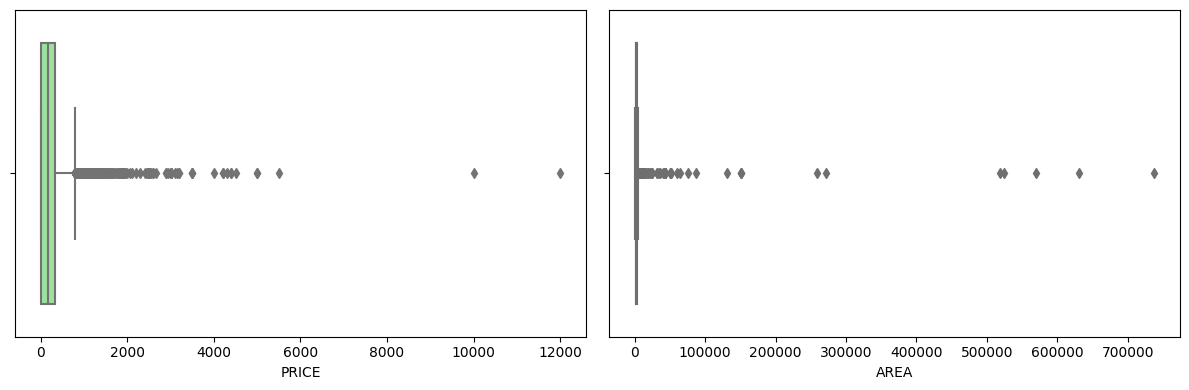

In [13]:
boxplot(df)

I can simply remove the properties whose `PRICE>50 Cr` and `AREA>1L sq.ft.`.

In [14]:
print(f"Before Shape: {df.shape}")
df = df.query("PRICE<5000 and AREA<@C.LAKH")
print(f"After Shape:  {df.shape}")

Before Shape: (10032, 10)
After Shape:  (10017, 10)


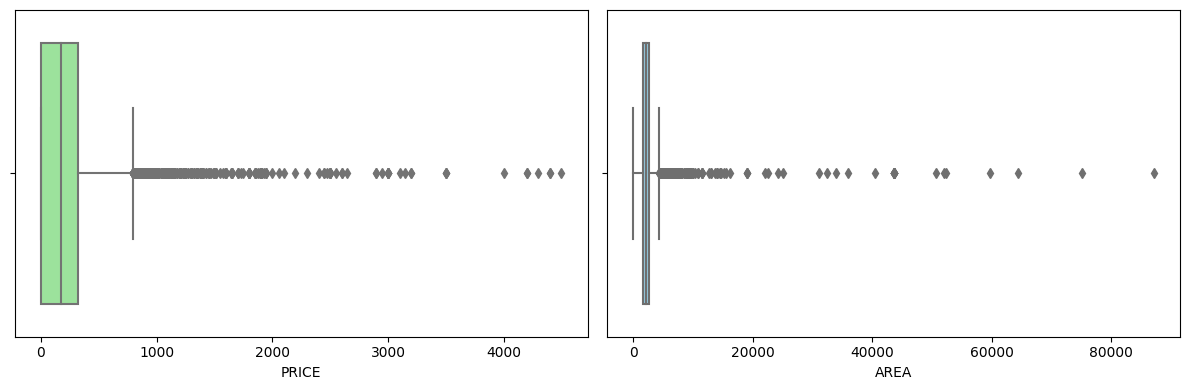

In [15]:
boxplot(df)

In [16]:
df.query("PRICE>2500")["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        16
residential land              6
independent house/villa       3
independent/builder floor     2
Name: count, dtype: int64

In [17]:
df.query("AREA>20000")["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential land             12
residential apartment         6
independent/builder floor     5
independent house/villa       2
Name: count, dtype: int64

In [18]:
df.query("PRICE>2500 and AREA>@C.TEN_K")["PROPERTY_TYPE"].value_counts()

Series([], Name: count, dtype: int64)

## Rental properties in whole dataset

In [19]:
rent_temp = pd.concat(
    [df[df["DESCRIPTION"].str.contains(" rent ") & (df["PRICE"] < 20)], df.query("PRICE<5")],
    ignore_index=True,
)
print(rent_temp.shape)
rent_temp.head()

(4471, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/U70794112,gurgaon,0.070,10.0,700.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,1.0,rof ananda
1,https://99acres.com/O70607360,gurgaon,0.075,14.0,514.0,2 bhk flat in sector 107 gurgaon,cheap rent and best place and location at dwar...,residential apartment,2.0,signature global solera 2
2,https://99acres.com/S69621256,gurgaon,0.085,8.0,980.0,2 bhk flat in sector 95 gurgaon,find this 2 bhk apartment for rent in sector 9...,residential apartment,2.0,ramsons kshitij
3,https://99acres.com/J70794066,gurgaon,0.085,8.0,980.0,2 bhk flat in sector 95 gurgaon,"ramsons kshitij , sector 95, near to wazirpur ...",residential apartment,2.0,ramsons kshitij
4,https://99acres.com/F70794132,gurgaon,0.085,9.0,910.0,2 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,2.0,rof ananda


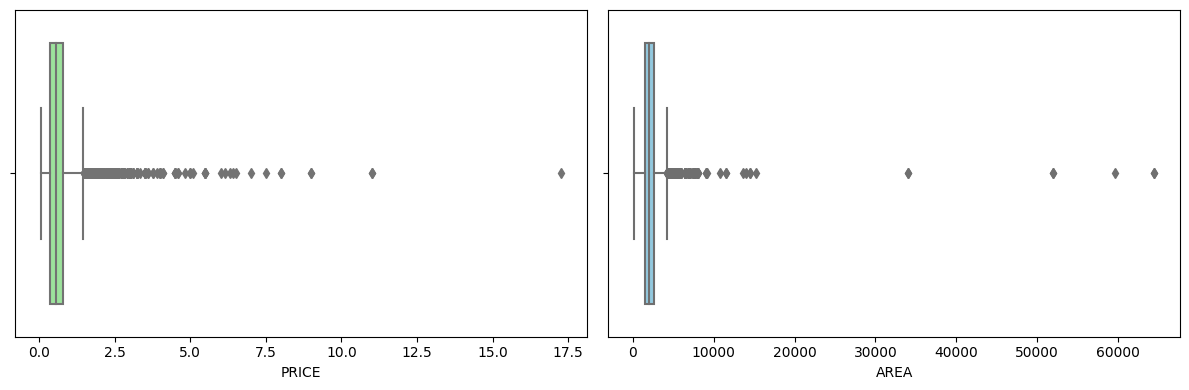

In [20]:
boxplot(rent_temp)

In [21]:
rent_temp.query("PRICE>10 or AREA>30000")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
28,https://99acres.com/J71017380,gurgaon,0.14,0.0,51922.0,2 bhk flat in sector 37d gurgaon,explore this amicable signature global the mil...,residential apartment,2.0,signature global the millennia
191,https://99acres.com/W70124072,gurgaon,0.26,0.0,64451.0,2 bhk flat in sector 37d gurgaon,find this 2 bhk apartment for rent in sector 3...,residential apartment,2.0,signature global the millennia
423,https://99acres.com/P69913556,gurgaon,0.35,1.0,34000.0,3 bedroom house in sector 10a gurgaon,rent this 3 bhk house in gurgaon's most sought...,independent house/villa,3.0,NaN
1780,https://99acres.com/R70716848,gurgaon,11.00,2200.0,4500.0,36 bedroom house in sector 46 gurgaon,guest house for lease 36 rooms ultra luxury fu...,independent house/villa,36.0,rwa sector 46
1781,https://99acres.com/D68894450,gurgaon,11.00,146.0,10777.0,5 bhk flat in sector 42 gurgaon,a 4 bhk duplex flat for rent in sector 42 gurg...,residential apartment,5.0,dlf the magnolias
1782,https://99acres.com/B71021026,gurgaon,17.25,2422.0,712.0,2 bhk independent builder floor in sector 63 g...,brand new builder floor available for sale in ...,independent/builder floor,2.0,adani brahma samsara vilasa
1820,https://99acres.com/J71017380,gurgaon,0.14,0.0,51922.0,2 bhk flat in sector 37d gurgaon,explore this amicable signature global the mil...,residential apartment,2.0,signature global the millennia
1868,https://99acres.com/T70769006,gurgaon,0.17,0.0,59612.0,2 bhk flat in sector 37d gurgaon,ready to move property for rent,residential apartment,2.0,signature global the millennia
2089,https://99acres.com/W70124072,gurgaon,0.26,0.0,64451.0,2 bhk flat in sector 37d gurgaon,find this 2 bhk apartment for rent in sector 3...,residential apartment,2.0,signature global the millennia
2459,https://99acres.com/P69913556,gurgaon,0.35,1.0,34000.0,3 bedroom house in sector 10a gurgaon,rent this 3 bhk house in gurgaon's most sought...,independent house/villa,3.0,NaN


> Some properties have almost `₹0` of `PRICE_SQFT`.

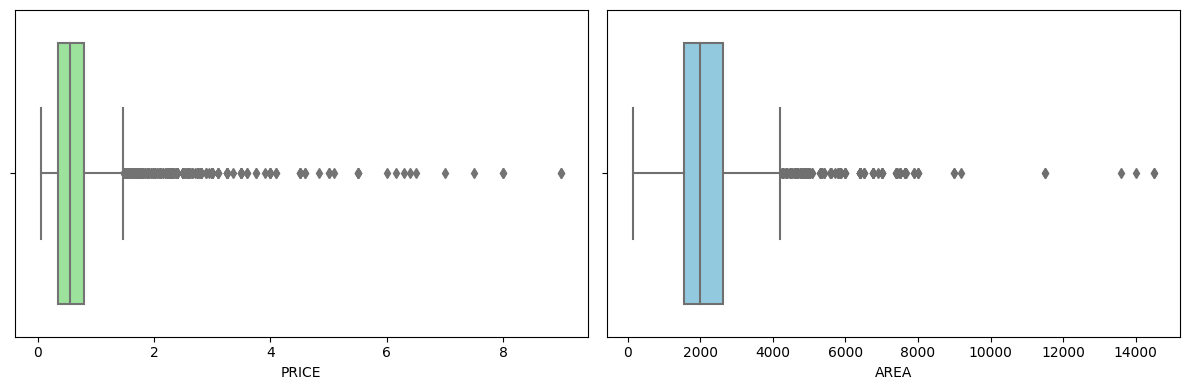

In [22]:
boxplot(rent_temp.query("PRICE<10 and AREA<15000"))

In [23]:
rent_temp.query("PRICE<10 and AREA<15000")["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        3177
independent/builder floor    1005
independent house/villa       277
residential land                1
Name: count, dtype: int64

## Split dataset on `PROPERTY_TYPE`

In [24]:
df["PROPERTY_TYPE"].value_counts()

PROPERTY_TYPE
residential apartment        5940
independent/builder floor    2469
residential land              987
independent house/villa       621
Name: count, dtype: int64

In [25]:
res_apartment = df.query("PROPERTY_TYPE=='residential apartment'").reset_index(drop=True)
ind_floor = df.query("PROPERTY_TYPE=='independent/builder floor'").reset_index(drop=True)
res_land = df.query("PROPERTY_TYPE=='residential land'").reset_index(drop=True)
ind_house = df.query("PROPERTY_TYPE=='independent house/villa'").reset_index(drop=True)

In [26]:
print(f"{res_apartment.shape = }")
print(f"{ind_floor.shape = }")
print(f"{res_land.shape = }")
print(f"{ind_house.shape = }")

res_apartment.shape = (5940, 10)
ind_floor.shape = (2469, 10)
res_land.shape = (987, 10)
ind_house.shape = (621, 10)


## Residential Apartments

In [27]:
print(res_apartment.shape)
res_apartment.head()

(5940, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/J70480214,gurgaon,0.055,15.0,350.0,1 bhk flat in sector 107 gurgaon,very much demanding property at dwarka express...,residential apartment,1.0,signature global solera 2
1,https://99acres.com/U70794112,gurgaon,0.070,10.0,700.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,1.0,rof ananda
2,https://99acres.com/O70607360,gurgaon,0.075,14.0,514.0,2 bhk flat in sector 107 gurgaon,cheap rent and best place and location at dwar...,residential apartment,2.0,signature global solera 2
3,https://99acres.com/S69621256,gurgaon,0.085,8.0,980.0,2 bhk flat in sector 95 gurgaon,find this 2 bhk apartment for rent in sector 9...,residential apartment,2.0,ramsons kshitij
4,https://99acres.com/J70794066,gurgaon,0.085,8.0,980.0,2 bhk flat in sector 95 gurgaon,"ramsons kshitij , sector 95, near to wazirpur ...",residential apartment,2.0,ramsons kshitij


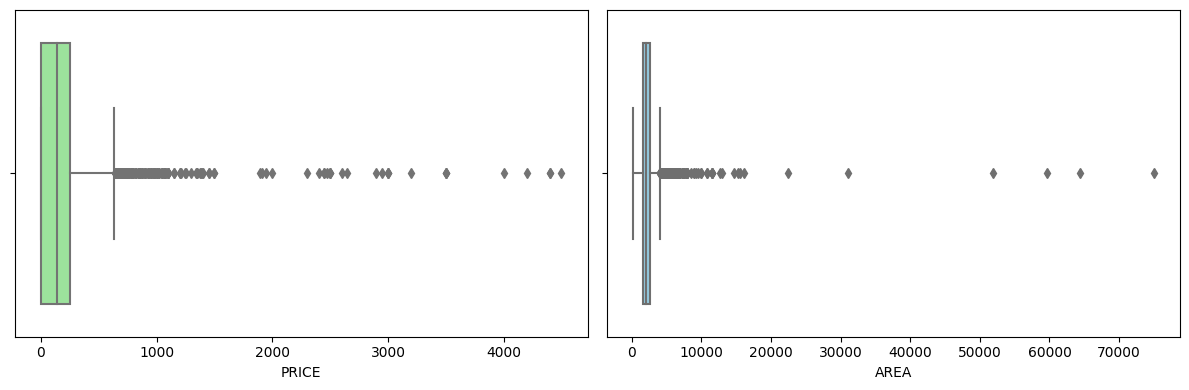

In [28]:
boxplot(res_apartment)

### **Rental** Resdential Apartment

In [29]:
rent_res_apartment = pd.concat(
    [
        res_apartment[
            res_apartment["DESCRIPTION"].str.contains(" rent ") & (res_apartment["PRICE"] < 20)
        ],
        res_apartment.query("PRICE<10"),
    ]
).drop_duplicates(ignore_index=True)

print(rent_res_apartment.shape)
rent_res_apartment.head()

(1889, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/U70794112,gurgaon,0.070,10.0,700.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,1.0,rof ananda
1,https://99acres.com/O70607360,gurgaon,0.075,14.0,514.0,2 bhk flat in sector 107 gurgaon,cheap rent and best place and location at dwar...,residential apartment,2.0,signature global solera 2
2,https://99acres.com/S69621256,gurgaon,0.085,8.0,980.0,2 bhk flat in sector 95 gurgaon,find this 2 bhk apartment for rent in sector 9...,residential apartment,2.0,ramsons kshitij
3,https://99acres.com/J70794066,gurgaon,0.085,8.0,980.0,2 bhk flat in sector 95 gurgaon,"ramsons kshitij , sector 95, near to wazirpur ...",residential apartment,2.0,ramsons kshitij
4,https://99acres.com/F70794132,gurgaon,0.085,9.0,910.0,2 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,2.0,rof ananda


In [30]:
rent_res_apartment.tail()

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
1884,https://99acres.com/O70264786,gurgaon,6.2,85.0,6400.0,4 bhk flat in sector 42 gurgaon,this property is 4 bhk with 6 balconies. modul...,residential apartment,4.0,dlf the magnolias
1885,https://99acres.com/X58352256,gurgaon,6.5,102.0,6350.0,4 bhk flat in sector 42 gurgaon,dlf magnolias dlf magnolia is aimed at giving...,residential apartment,4.0,dlf the magnolias
1886,https://99acres.com/Z64619730,gurgaon,7.5,104.0,7196.0,4 bhk flat in sector 42 gurgaon,golf drive communities countrys finest living....,residential apartment,4.0,dlf the camellias
1887,https://99acres.com/K21691199,gurgaon,8.5,63.0,10777.0,5 bhk flat in sector 42 gurgaon,"penthouse, corner unit is available at higher ...",residential apartment,5.0,dlf the magnolias
1888,https://99acres.com/Y70623172,gurgaon,8.5,114.0,7400.0,4 bhk flat in sector 42 gurgaon,the camellia 4 bhk apartment area 7400 sq.ft. ...,residential apartment,4.0,dlf the camellias


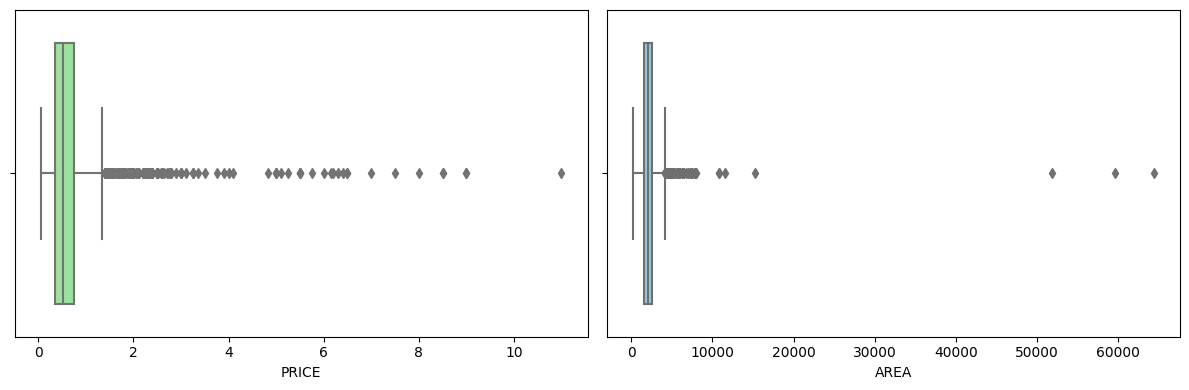

In [31]:
boxplot(rent_res_apartment)

In [32]:
rent_res_apartment.query("AREA>@C.TEN_K")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
27,https://99acres.com/J71017380,gurgaon,0.14,0.0,51922.0,2 bhk flat in sector 37d gurgaon,explore this amicable signature global the mil...,residential apartment,2.0,signature global the millennia
153,https://99acres.com/W70124072,gurgaon,0.26,0.0,64451.0,2 bhk flat in sector 37d gurgaon,find this 2 bhk apartment for rent in sector 3...,residential apartment,2.0,signature global the millennia
1295,https://99acres.com/E70945852,gurgaon,2.80,48.0,11505.0,5 bhk flat in sector 65 gurgaon,find this 5 bhk apartment for rent in sector 6...,residential apartment,5.0,m3m golfestate
1319,https://99acres.com/D68894450,gurgaon,11.00,146.0,10777.0,5 bhk flat in sector 42 gurgaon,a 4 bhk duplex flat for rent in sector 42 gurg...,residential apartment,5.0,dlf the magnolias
1335,https://99acres.com/T70769006,gurgaon,0.17,0.0,59612.0,2 bhk flat in sector 37d gurgaon,ready to move property for rent,residential apartment,2.0,signature global the millennia
1474,https://99acres.com/Z70859120,gurgaon,0.35,20.0,15228.0,3 bhk flat in sector 102 gurgaon,shapoorji pallonji luxurious society all types...,residential apartment,3.0,shapoorji pallonji joyville gurugram
1887,https://99acres.com/K21691199,gurgaon,8.50,63.0,10777.0,5 bhk flat in sector 42 gurgaon,"penthouse, corner unit is available at higher ...",residential apartment,5.0,dlf the magnolias


(1882, 10)


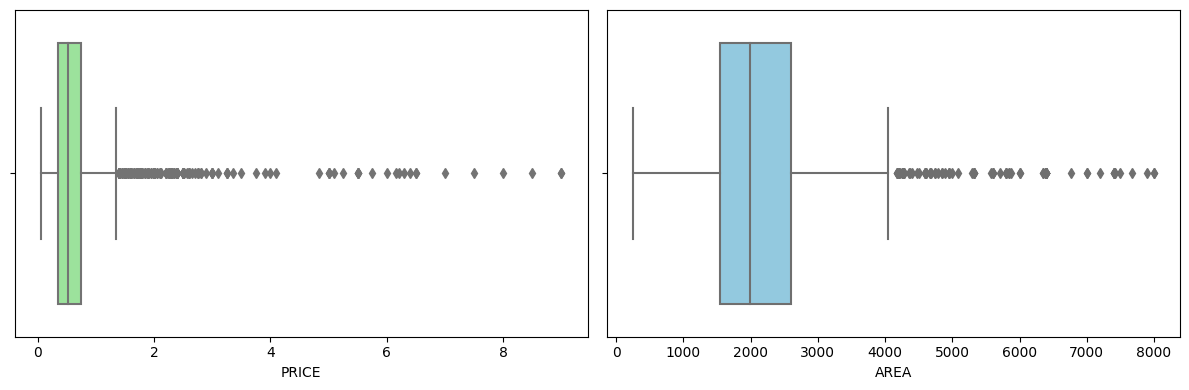

In [33]:
rent_res_apartment = rent_res_apartment.query("AREA<@C.TEN_K")
print(rent_res_apartment.shape)
boxplot(rent_res_apartment)

In [34]:
rent_res_apartment[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,1882.000000,1882.000000,1882.000000
mean,0.743462,2163.523911,32.341658
std,0.837840,1060.041440,20.352755
min,0.055000,256.000000,7.000000
25%,0.350000,1545.000000,20.000000
50%,0.520000,1996.000000,28.000000
75%,0.750000,2593.250000,39.000000
max,9.000000,8000.000000,294.000000


### **Summary** - _Rental_ Residential Apartment

- Data Length: **1.9k**
- PRICE range: **5500 to 9L**
- AREA range: **256 to 8k sq.ft.**

### **Drop** rental apartments

In [35]:
res_apartment = res_apartment.drop(
    index=res_apartment[res_apartment["PROP_ID"].isin(rent_res_apartment["PROP_ID"])].index,
).reset_index(drop=True)

In [36]:
# As I removed some outliers in rental apartments
# Those data comes into residential apartments
# So  need to remove them
res_apartment = res_apartment.query("PRICE>10")

print(res_apartment.shape)
res_apartment.head()

(4052, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
6,https://99acres.com/D68894450,gurgaon,11.00,146.0,10777.0,5 bhk flat in sector 42 gurgaon,a 4 bhk duplex flat for rent in sector 42 gurg...,residential apartment,5.0,dlf the magnolias
7,https://99acres.com/Y70794212,gurgaon,17.75,4277.0,600.0,1 bhk flat in sector 95 gurgaon,"ramsons kshitij , sector 95 imt manesar, main ...",residential apartment,1.0,ramsons kshitij
8,https://99acres.com/S70190322,gurgaon,20.00,5463.0,366.0,1 bhk flat in sector 95 gurgaon,"situated in sector 95 gurgaon, rof ananda is a...",residential apartment,1.0,rof ananda
9,https://99acres.com/C64640776,gurgaon,20.33,3663.0,555.0,2 bhk flat in sector 86 gurgaon,check out this 2 bhk apartment for sale in gls...,residential apartment,2.0,gls avenue 86
10,https://99acres.com/F70190474,gurgaon,20.50,5599.0,366.0,1 bhk flat in sector 95 gurgaon,located in the popular residential address of ...,residential apartment,1.0,rof ananda


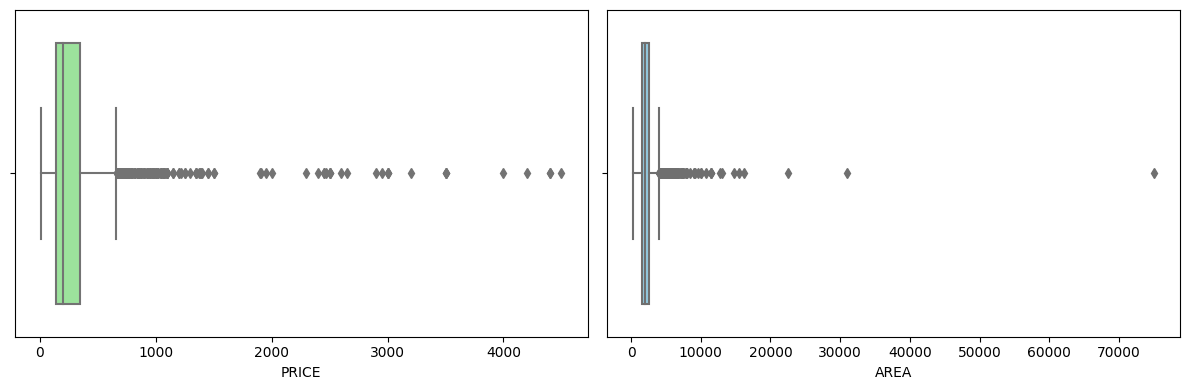

In [37]:
boxplot(res_apartment)

In [38]:
res_apartment.query("PRICE<20")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
6,https://99acres.com/D68894450,gurgaon,11.00,146.0,10777.0,5 bhk flat in sector 42 gurgaon,a 4 bhk duplex flat for rent in sector 42 gurg...,residential apartment,5.0,dlf the magnolias
7,https://99acres.com/Y70794212,gurgaon,17.75,4277.0,600.0,1 bhk flat in sector 95 gurgaon,"ramsons kshitij , sector 95 imt manesar, main ...",residential apartment,1.0,ramsons kshitij


In [39]:
res_apartment.drop(res_apartment.query("AREA>20000").index, inplace=True)

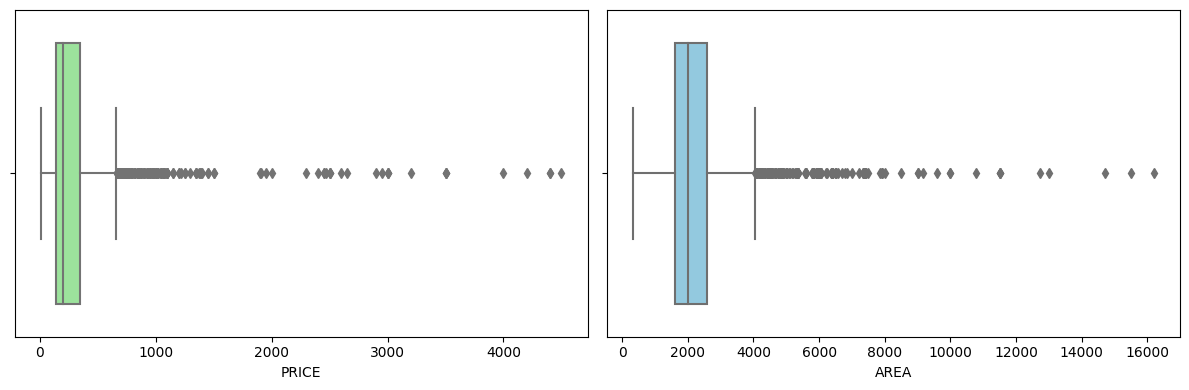

In [40]:
boxplot(res_apartment)

In [41]:
res_apartment[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,4049.000000,4049.000000,4049.000000
mean,283.357506,2233.973203,12668.638676
std,302.659953,1141.293733,11591.966583
min,11.000000,342.000000,146.000000
25%,138.000000,1620.000000,8080.000000
50%,200.000000,2000.000000,10707.000000
75%,347.000000,2588.000000,14485.000000
max,4500.000000,16200.000000,302083.000000


### **Summary** - Residential Apartment

- Data Length: **4k**
- PRICE range: **11L to 45Cr**
- AREA range: **342 to 16.2k sq.ft.**

## Independent Builer Floors

In [42]:
print(ind_floor.shape)
ind_floor.head()

(2469, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/V70318584,gurgaon,0.12999,8.0,1464.0,1 bhk independent builder floor in sector 22 g...,only 1 big sie bed room set available for rent...,independent/builder floor,1.0,saksham welfare association
1,https://99acres.com/A70375250,gurgaon,0.14500,16.0,900.0,1 bhk independent builder floor in sector 21 g...,one bhk builders floor apartment for rent in s...,independent/builder floor,1.0,sector 21 rwa
2,https://99acres.com/S70666054,gurgaon,0.15000,14.0,1000.0,3 bhk independent builder floor in ashok vihar...,carefully laid out in the prime location of gu...,independent/builder floor,3.0,NaN
3,https://99acres.com/I70134496,gurgaon,0.15000,15.0,950.0,2 bhk independent builder floor in sector 23a ...,this is park facing property front of 15 acre ...,independent/builder floor,2.0,NaN
4,https://99acres.com/C70257788,gurgaon,0.15500,14.0,1092.0,2 bhk independent builder floor in sector 83 g...,this 2 bhk flat is located on 1st floor out of...,independent/builder floor,2.0,vatika emilia floors


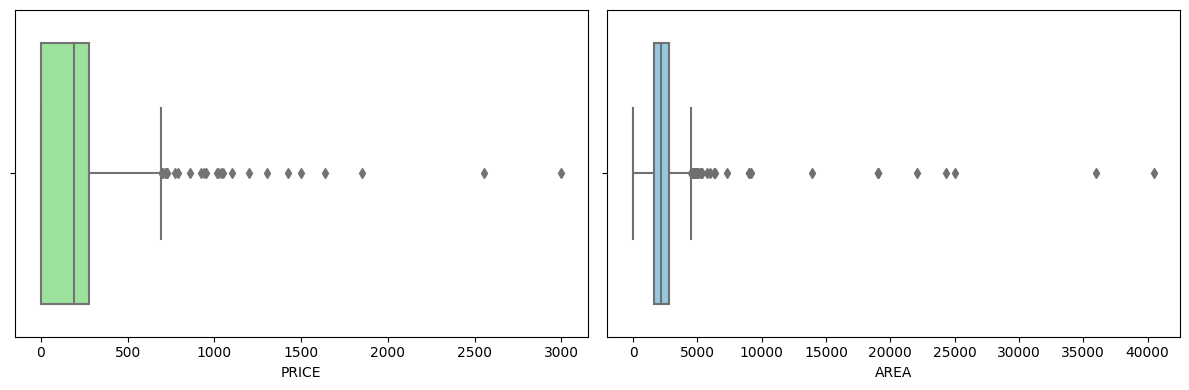

In [43]:
boxplot(ind_floor)

### **Rental** Independent Builder Floors

In [44]:
rent_ind_floor = pd.concat(
    [
        ind_floor[ind_floor["DESCRIPTION"].str.contains(" rent ") & (ind_floor["PRICE"] < 20)],
        ind_floor.query("PRICE<5"),
    ]
).drop_duplicates(ignore_index=True)

print(rent_ind_floor.shape)
rent_ind_floor.head()

(643, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/V70318584,gurgaon,0.12999,8.0,1464.0,1 bhk independent builder floor in sector 22 g...,only 1 big sie bed room set available for rent...,independent/builder floor,1.0,saksham welfare association
1,https://99acres.com/A70375250,gurgaon,0.14500,16.0,900.0,1 bhk independent builder floor in sector 21 g...,one bhk builders floor apartment for rent in s...,independent/builder floor,1.0,sector 21 rwa
2,https://99acres.com/S70666054,gurgaon,0.15000,14.0,1000.0,3 bhk independent builder floor in ashok vihar...,carefully laid out in the prime location of gu...,independent/builder floor,3.0,NaN
3,https://99acres.com/A70122022,gurgaon,0.15500,17.0,877.0,1 bhk independent builder floor in sector 23a ...,one bhk builders floor apartment for rent in s...,independent/builder floor,1.0,progressive rwa
4,https://99acres.com/U71005354,gurgaon,0.16500,33.0,500.0,1 bhk independent builder floor in c block sus...,fully furnished one room set for rent in susha...,independent/builder floor,1.0,ansal


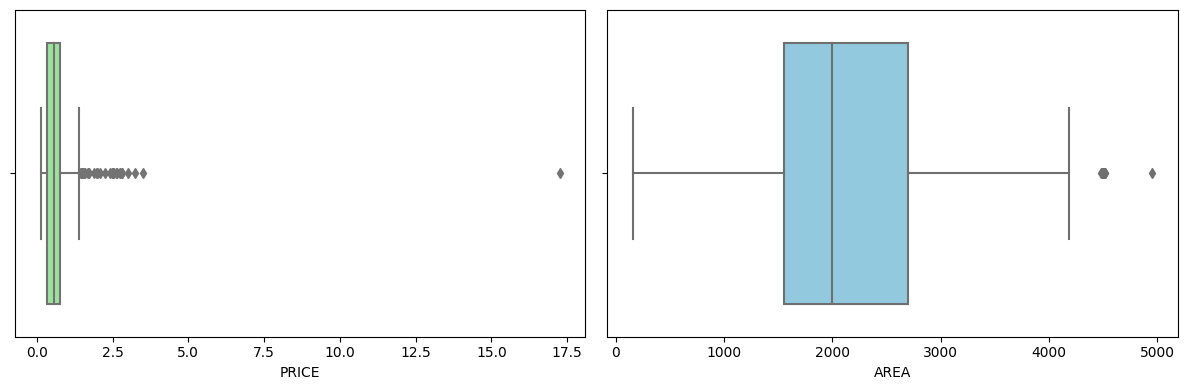

In [45]:
boxplot(rent_ind_floor)

In [46]:
print(rent_ind_floor.query("PRICE>10").shape)
print(rent_ind_floor.query("AREA>4300").shape)
print(rent_ind_floor.query("AREA<700").shape)

(1, 10)
(35, 10)
(28, 10)


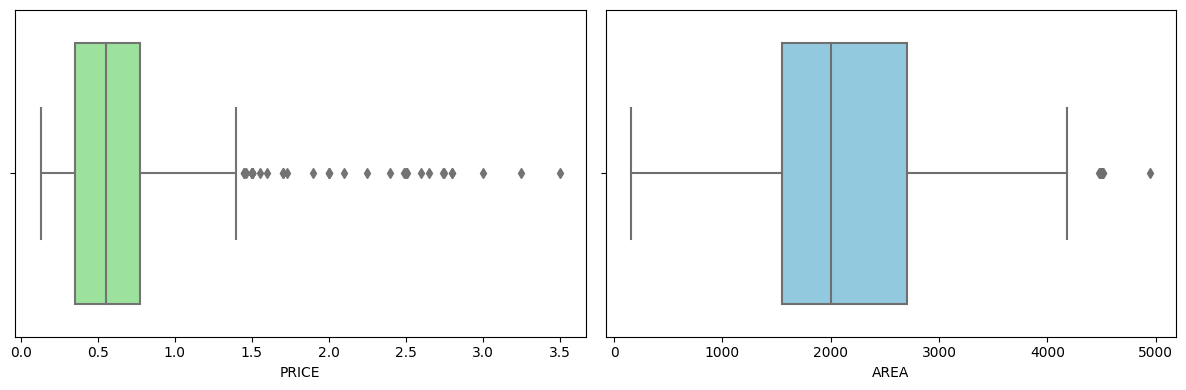

In [47]:
# Remove the extreme value from rental data
rent_ind_floor.drop(index=rent_ind_floor.query("PRICE>10").index, inplace=True)
boxplot(rent_ind_floor)

In [48]:
rent_ind_floor[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,642.000000,642.000000,642.000000
mean,0.664813,2149.105919,98.095016
std,0.479121,948.496665,135.925310
min,0.129990,160.000000,8.000000
25%,0.350000,1550.000000,24.000000
50%,0.550000,2000.000000,34.000000
75%,0.775000,2700.000000,126.750000
max,3.500000,4950.000000,1250.000000


### **Summary** - _Rental_ Independent Builder Floors

- Data Length: **640**
- PRICE range: **12k to 3L**
- AREA range: **160 to 5k sq.ft.**

### **Drop** rental independent floors

(1827, 10)


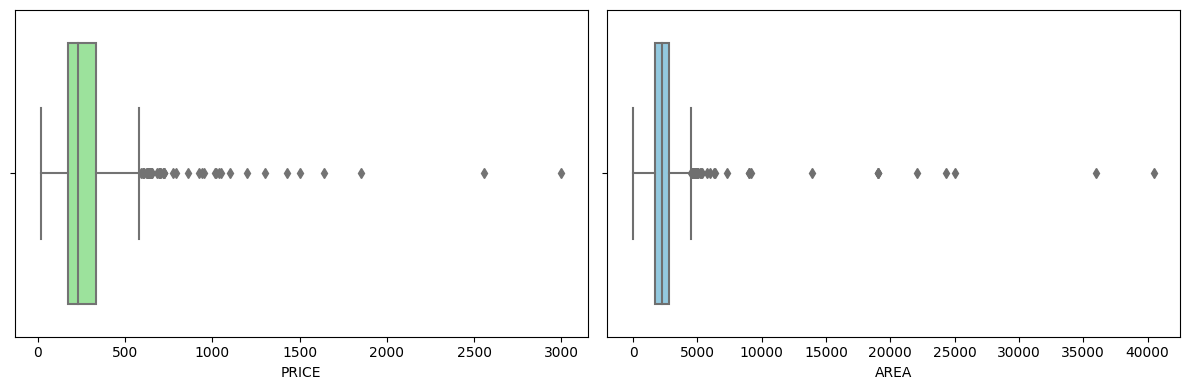

In [49]:
ind_floor = ind_floor.drop(
    index=ind_floor[ind_floor["PROP_ID"].isin(rent_ind_floor["PROP_ID"])].index,
).reset_index(drop=True)

print(ind_floor.shape)
boxplot(ind_floor)

In [50]:
ind_floor.query("PRICE>2000 or AREA>@C.TEN_K")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
258,https://99acres.com/H70734208,gurgaon,135.0,8709.0,13950.0,3 bhk independent builder floor in sector 50 g...,vary good location and near lotus vally school...,independent/builder floor,3.0,NaN
998,https://99acres.com/L70643314,gurgaon,242.0,6050.0,36000.0,3 bhk independent builder floor in sector 57 g...,4bhk plus sarvent semi furnished 2nd floor lif...,independent/builder floor,3.0,NaN
1113,https://99acres.com/F70748132,gurgaon,260.0,9629.0,24300.0,4 bhk independent builder floor in sector 51 g...,"mayfield garden sector 51, gurgaon, haryana ne...",independent/builder floor,4.0,mayfield gardens
1156,https://99acres.com/V70911336,gurgaon,265.0,1389.0,19075.0,4 bhk independent builder floor in sector 51 g...,this property is situated in sector 51 in this...,independent/builder floor,4.0,today blossoms 2
1197,https://99acres.com/F70513262,gurgaon,275.0,1243.0,22111.0,4 bhk independent builder floor in sector 57 g...,located at prime location . reasonable price ...,independent/builder floor,4.0,sushant lok 3
1212,https://99acres.com/N70911806,gurgaon,280.0,1467.0,19075.0,4 bhk independent builder floor in sector 51 g...,this property is situated in sector 51 1floor ...,independent/builder floor,4.0,today blossoms 2
1256,https://99acres.com/U70906526,gurgaon,295.0,1546.0,19075.0,4 bhk independent builder floor in sector 51 g...,this area is situated in sector 51 .plot size ...,independent/builder floor,4.0,today blossoms 2
1552,https://99acres.com/U70466660,gurgaon,400.0,8888.0,40500.0,4 bhk independent builder floor in malibu town,this is huge builder floor greenry facing or p...,independent/builder floor,4.0,optimal luxury malibu town floors
1821,https://99acres.com/T70450364,gurgaon,1425.0,7125.0,25000.0,55 bhk independent builder floor in sector 38 ...,"this is agood for investment ,its a rented gue...",independent/builder floor,55.0,huda floor
1825,https://99acres.com/M70954334,gurgaon,2555.0,72974.0,3494.5,4 bhk independent builder floor in sector 92 g...,"dlf garden city floors in sector-92, gurgaon b...",independent/builder floor,4.0,dlf garden city floors


(1816, 10)


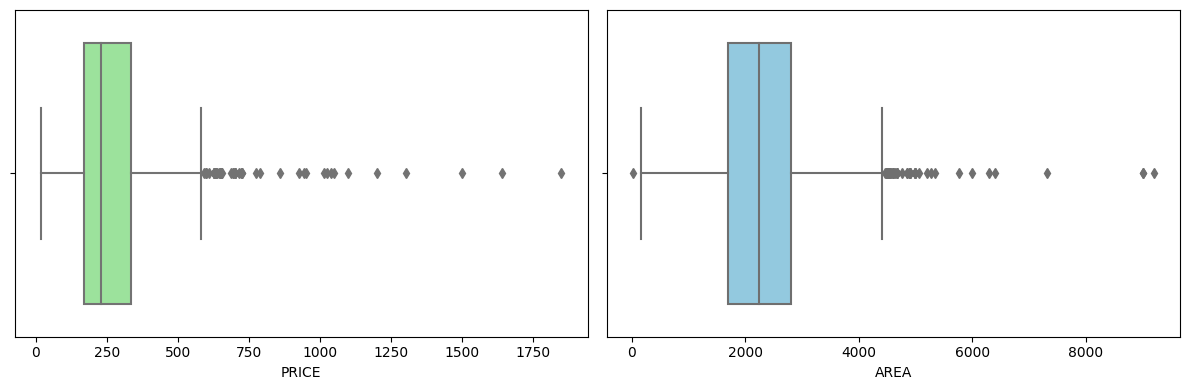

In [51]:
# Remove the outliers from PRICE and AREA column
ind_floor = ind_floor.query("PRICE<2500 and AREA<@C.TEN_K")
print(ind_floor.shape)
boxplot(ind_floor)

In [52]:
ind_floor[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,1816.000000,1816.000000,1.816000e+03
mean,261.958947,2394.109581,3.977852e+04
std,152.324102,1012.960323,6.146375e+04
min,17.250000,30.000000,2.422000e+03
25%,170.000000,1700.750000,9.820250e+03
50%,228.500000,2250.000000,1.300000e+04
75%,335.000000,2800.000000,7.174950e+04
max,1850.000000,9198.000000,1.733333e+06


### **Summary** - Independent Builder Floors

- Data Length: **18k**
- PRICE range: **17 Lac to 18 Cr**
- AREA range: **30 to 91k sq.ft.**

## Residential Lands

In [53]:
print(res_land.shape)
res_land.head()

(987, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/R70515244,gurgaon,2.3,958.0,2160.0,residential land / plot in malibu town,"lemon street, malibu town, gurgaon, haryana 3s...",residential land,NaN,malibu towne
1,https://99acres.com/J70707946,gurgaon,9.0,15000.0,60.0,residential land / plot in shree ram colony,sector 102 near by amstoria bptp plots he plo...,residential land,NaN,sector 102
2,https://99acres.com/Q69980568,gurgaon,12.6,2000.0,630.0,residential land / plot in maruti kunj,etr developers pvt. ltd. presents kuldeep aven...,residential land,NaN,NaN
3,https://99acres.com/P70125644,gurgaon,15.0,12500.0,120.0,residential land / plot in bhondsi,planning to purchase a plot in gurgaon? this p...,residential land,NaN,shyam kunj
4,https://99acres.com/Z70930360,gurgaon,15.0,15000.0,900.0,residential land / plot in farrukh nagar,we have a polt available for sale in farrukh n...,residential land,NaN,NaN


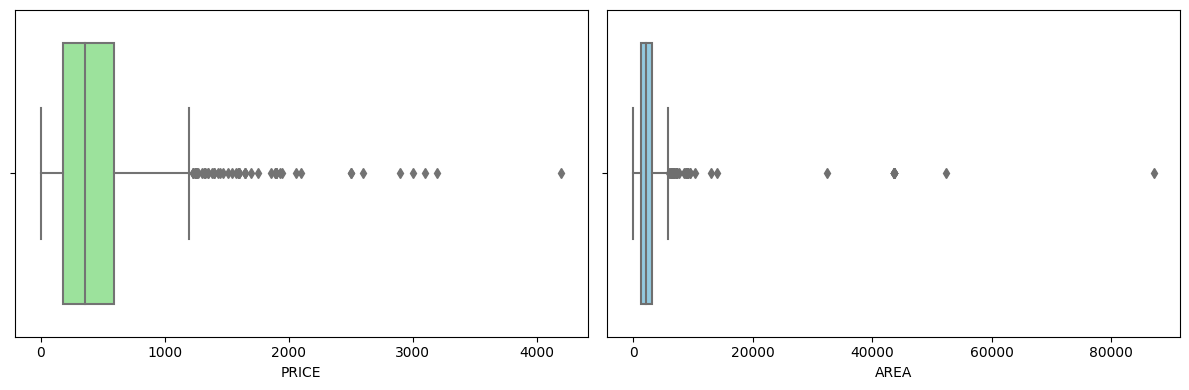

In [54]:
boxplot(res_land)

In [55]:
res_land.query("PRICE>2200")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
979,https://99acres.com/J70350486,gurgaon,2500.0,366568.0,6138.0,residential land / plot in dlf phase 2,available for sale 682 sq.yrd plot area with g...,residential land,NaN,NaN
980,https://99acres.com/W70644790,gurgaon,2500.0,311332.0,7227.0,residential land / plot in sector 60 gurgaon,"main 60 mtr wide road plot, excellent location...",residential land,NaN,ireo city plots
981,https://99acres.com/G70382180,gurgaon,2600.0,260000.0,9000.0,residential land / plot in dlf phase 2,available for sale 1000 sq.yrd plot area with ...,residential land,NaN,NaN
982,https://99acres.com/W70158776,gurgaon,2900.0,290000.0,9000.0,residential land / plot in south city 1,"1000yds plot at prime location of e-block, eas...",residential land,NaN,NaN
983,https://99acres.com/I70816434,gurgaon,3000.0,300000.0,9000.0,residential land / plot in south city 1,its a nice property available for sale in sout...,residential land,NaN,NaN
984,https://99acres.com/R69939968,gurgaon,3100.0,375757.0,7425.0,residential land / plot in sushant lok phase 1,avl for sale independent building stilt + 3.5...,residential land,NaN,NaN
985,https://99acres.com/Q70250390,gurgaon,3200.0,313111.0,9198.0,residential land / plot in dlf phase 1,1022 yards plot sell in dlf phase 1 2 side ope...,residential land,NaN,NaN
986,https://99acres.com/N70664754,gurgaon,4200.0,130000.0,3000.0,residential land / plot in sector 83 gurgaon,vatika plot location good property near park a...,residential land,NaN,vatika india next plots


In [56]:
res_land.query("AREA>20000")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
106,https://99acres.com/B70029912,gurgaon,120.0,12000000.0,43560.0,residential land / plot in sohna road,"agriculture land 3 acre is available on sale, ...",residential land,NaN,NaN
119,https://99acres.com/E70190906,gurgaon,125.0,12500000.0,43560.0,residential land / plot in sohna palwal road,"agriculture land on sohna palwal road, khalilp...",residential land,NaN,NaN
277,https://99acres.com/C70390086,gurgaon,200.0,6666667.0,52271.0,residential land / plot in sohna,planning to build residence in haryana others?...,residential land,NaN,vatika westin sohna resort
303,https://99acres.com/M70190218,gurgaon,220.0,22000000.0,43560.0,residential land / plot in sohna palwal road k...,agriculture land on sohna palwal road kmp expr...,residential land,NaN,NaN
308,https://99acres.com/A70189902,gurgaon,225.0,22500000.0,43560.0,residential land / plot in sohna palwal road k...,agriculture land on sohna palwal road kmp expr...,residential land,NaN,NaN
322,https://99acres.com/Y70234066,gurgaon,230.0,23000000.0,43560.0,residential land / plot in sohna palwal road kmp,agriculture land on sohna palwal road kmp road.,residential land,NaN,NaN
343,https://99acres.com/X70190386,gurgaon,240.0,24000000.0,43560.0,residential land / plot in sohna palwal road k...,agriculture land on sohna palwal road kmp expr...,residential land,NaN,NaN
488,https://99acres.com/U70947746,gurgaon,350.0,9722.0,32400.0,residential land / plot in sector 7 gurgaon,we have many options in sohna sector 7 sector ...,residential land,NaN,NaN
617,https://99acres.com/Z70190704,gurgaon,450.0,45000000.0,43560.0,residential land / plot in sohna road bhondsi ...,"agriculture land on sohna road near bhondsi , ...",residential land,NaN,NaN
618,https://99acres.com/P70234488,gurgaon,450.0,45000000.0,43560.0,"residential land / plot in maruti kunj, sohna ...",agriculture land on sohna road maruti kunj.,residential land,NaN,NaN


In [57]:
np.ceil((res_land.isnull().sum() / res_land.shape[0]) * 100)

PROP_ID            0.0
CITY               0.0
PRICE              0.0
PRICE_SQFT         0.0
AREA               0.0
PROP_HEADING       0.0
DESCRIPTION        0.0
PROPERTY_TYPE      0.0
BEDROOM_NUM      100.0
PROP_NAME         41.0
dtype: float64

In [58]:
res_land[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,987.000000,987.000000,9.870000e+02
mean,466.123161,3016.526342,4.778472e+05
std,430.913472,5369.351246,3.702786e+06
min,2.300000,60.000000,9.580000e+02
25%,182.500000,1350.000000,1.000000e+05
50%,355.000000,2160.000000,1.400000e+05
75%,592.000000,3150.000000,1.900000e+05
max,4200.000000,87120.000000,7.500000e+07


### **Summary** - Residential Lands

- Data Length: **980**
- PRICE range: **2.3 Lac to 42 Cr**
- AREA range: **60 to 87k sq.ft.**

In [59]:
# I checked
# These properties are true
res_land.query("AREA<150")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
1,https://99acres.com/J70707946,gurgaon,9.0,15000.0,60.0,residential land / plot in shree ram colony,sector 102 near by amstoria bptp plots he plo...,residential land,NaN,sector 102
3,https://99acres.com/P70125644,gurgaon,15.0,12500.0,120.0,residential land / plot in bhondsi,planning to purchase a plot in gurgaon? this p...,residential land,NaN,shyam kunj
58,https://99acres.com/F70731200,gurgaon,92.0,82142.0,112.0,residential land / plot in sector 93 gurgaon,loan available from all leading banks flexible...,residential land,NaN,rof insignia park
112,https://99acres.com/J70207274,gurgaon,122.0,100826.0,121.0,residential land / plot in sector-35 sohna,for those looking to buy a residential propert...,residential land,NaN,ats plots secor 35 sohna
188,https://99acres.com/E70989888,gurgaon,162.0,135000.0,120.0,residential land / plot in sector 112 gurgaon,palam vihar railway station is a popular landm...,residential land,NaN,rishali luxe residency 112
214,https://99acres.com/T70128112,gurgaon,172.0,134375.0,128.0,residential land / plot in sector 112 gurgaon,true habitat 112 plot available for sale in se...,residential land,NaN,rishali luxe residency 112
245,https://99acres.com/Y70990172,gurgaon,182.0,130000.0,140.0,residential land / plot in sector 112 gurgaon,rishali luxe residency 112 gurgaon is a rera-r...,residential land,NaN,rishali luxe residency 112
253,https://99acres.com/J70186280,gurgaon,185.0,125000.0,148.0,residential land / plot in naurangpur,this property located in sector-79 on 60 miter...,residential land,NaN,NaN


## Independent Houses

In [60]:
print(ind_house.shape)
ind_house.head()

(621, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/G70811510,gurgaon,0.12000,75.0,1440.0,2 bedroom house in acharya puri extension,this is my own property available on 1st floor...,independent house/villa,2.0,NaN
1,https://99acres.com/C67120292,gurgaon,0.14000,17.0,900.0,3 bedroom house in dwarka expressway gurgaon,house/villa available for rent in dwarka expre...,independent house/villa,3.0,NaN
2,https://99acres.com/O70340856,gurgaon,0.18999,93.0,1836.0,1 bedroom house in sector 23 gurgaon,independent 2bed room set in sector 23 nearby ...,independent house/villa,1.0,all punjabi welfare association
3,https://99acres.com/I70727814,gurgaon,0.19000,105.0,1620.0,2 bedroom house in sector 83 gurgaon,a lovely 2 bhk house for rent in sector 83 gur...,independent house/villa,2.0,vatika emilia floors
4,https://99acres.com/T70738346,gurgaon,0.20000,14.0,1350.0,2 bedroom house in sector 23 gurgaon,"that property is at a very good location, all ...",independent house/villa,2.0,NaN


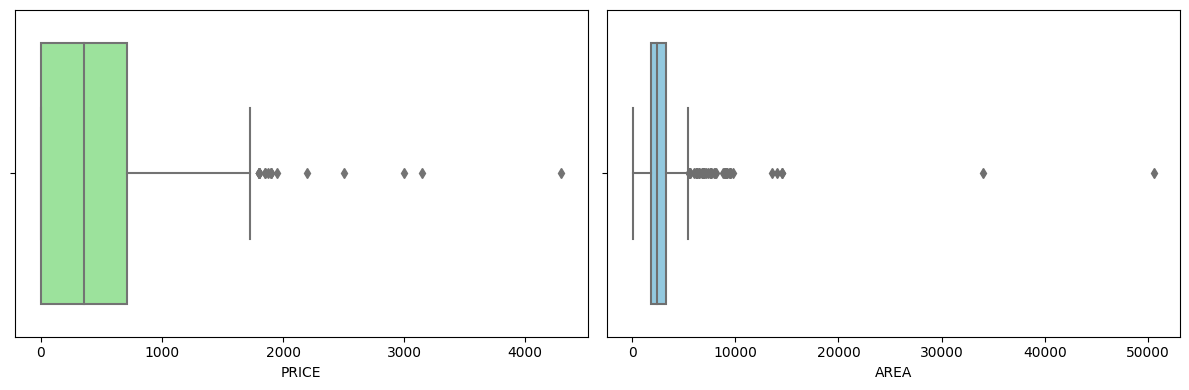

In [61]:
boxplot(ind_house)

### **Rental** Independent House

In [62]:
rent_ind_house = pd.concat(
    [
        ind_house[ind_house["DESCRIPTION"].str.contains(" rent ") & (ind_house["PRICE"] < 20)],
        ind_house.query("PRICE<6"),
    ]
).drop_duplicates(ignore_index=True)

print(rent_ind_house.shape)
rent_ind_house.head()

(184, 10)


,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/C67120292,gurgaon,0.14,17.0,900.0,3 bedroom house in dwarka expressway gurgaon,house/villa available for rent in dwarka expre...,independent house/villa,3.0,NaN
1,https://99acres.com/I70727814,gurgaon,0.19,105.0,1620.0,2 bedroom house in sector 83 gurgaon,a lovely 2 bhk house for rent in sector 83 gur...,independent house/villa,2.0,vatika emilia floors
2,https://99acres.com/O70498492,gurgaon,0.24,25.0,930.0,3 bedroom house in sector 82 gurgaon,this 3 bhk house for rent in sector 82 gurgaon...,independent house/villa,3.0,vatika independent floors
3,https://99acres.com/F70727964,gurgaon,0.25,104.0,2160.0,3 bedroom house in sector 84 gurgaon,find this 3 bhk house for rent in sector 84 gu...,independent house/villa,3.0,sas arcadia
4,https://99acres.com/R70806422,gurgaon,0.28,280.0,900.0,2 bedroom house in sector 40 gurgaon,this house is located in sector 40. the size o...,independent house/villa,2.0,NaN


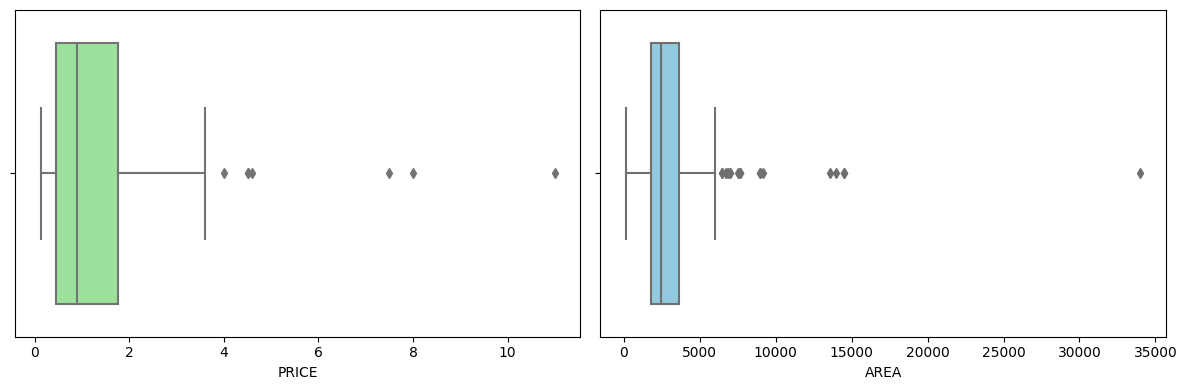

In [63]:
boxplot(rent_ind_house)

In [64]:
print(rent_ind_house.query("PRICE>5").shape)
print(rent_ind_house.query("AREA>@C.TEN_K").shape)

(3, 10)
(5, 10)


In [65]:
# I checked
# These properties are true
rent_ind_house.query("PRICE>5 or AREA>@C.TEN_K")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
13,https://99acres.com/P69913556,gurgaon,0.35,1.0,34000.0,3 bedroom house in sector 10a gurgaon,rent this 3 bhk house in gurgaon's most sought...,independent house/villa,3.0,NaN
96,https://99acres.com/Y70230934,gurgaon,7.50,81.0,9198.0,5 bedroom house in dlf phase 1,available for rent immediately. prime location...,independent house/villa,5.0,NaN
97,https://99acres.com/I70284162,gurgaon,8.00,800.0,9000.0,35 bedroom house in b block sushant lok phase 1,gesthouse for rent b block sushant lok 1 gurga...,independent house/villa,35.0,NaN
98,https://99acres.com/R70716848,gurgaon,11.00,2200.0,4500.0,36 bedroom house in sector 46 gurgaon,guest house for lease 36 rooms ultra luxury fu...,independent house/villa,36.0,rwa sector 46
160,https://99acres.com/B70761772,gurgaon,1.75,12.0,14000.0,34 bedroom house in sohna,indipendent building - saprate 17 1bhk flats -...,independent house/villa,34.0,NaN
173,https://99acres.com/X70299076,gurgaon,2.95,21.0,13600.0,8 bedroom house in sector 41 gurgaon,available ultra luxury villas for lease it's 8...,independent house/villa,8.0,unitech south city heights
177,https://99acres.com/V70239970,gurgaon,3.25,22.0,14500.0,8 bedroom house in sushant lok phase 1,available brand new luxury villas 8 bedroom wi...,independent house/villa,8.0,silverglades hightown residences
183,https://99acres.com/O70399122,gurgaon,3.60,24.0,14500.0,12 bedroom house in dlf phase 2,available very beautiful indepedent villas hou...,independent house/villa,12.0,NaN


In [66]:
rent_ind_house = rent_ind_house.query("AREA<15000")
rent_ind_house.shape

(183, 10)

In [67]:
rent_ind_house[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,183.000000,183.000000,183.000000
mean,1.342240,3115.617486,242.573770
std,1.395942,2479.667920,273.806047
min,0.120000,160.000000,8.000000
25%,0.450000,1800.000000,34.000000
50%,0.900000,2450.000000,175.000000
75%,1.750000,3600.000000,351.500000
max,11.000000,14500.000000,2200.000000


### **Summary** - _Rental_ Independent Houses

- Data Length: **180**
- PRICE range: **12k to 11L**
- AREA range: **160 to 14.5k sq.ft.**

### **Drop** rental independent houses

(438, 10)


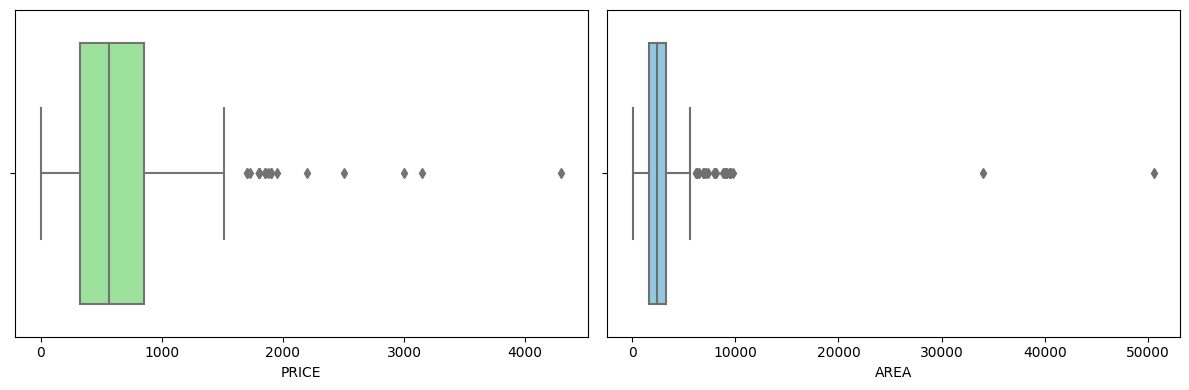

In [68]:
ind_house = ind_house.drop(
    index=ind_house[ind_house["PROP_ID"].isin(rent_ind_house["PROP_ID"])].index,
).reset_index(drop=True)

print(ind_house.shape)
boxplot(ind_house)

In [69]:
# I checked
ind_house.query("PRICE>3000 or AREA>@C.TEN_K")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
0,https://99acres.com/P69913556,gurgaon,0.35,1.0,34000.0,3 bedroom house in sector 10a gurgaon,rent this 3 bhk house in gurgaon's most sought...,independent house/villa,3.0,NaN
208,https://99acres.com/P70096892,gurgaon,550.00,11316.0,50580.0,8 bedroom house in mayfield garden,240sqyd 8bhk servant room ultra luxury kothi p...,independent house/villa,8.0,NaN
436,https://99acres.com/Z57944624,gurgaon,3150.00,315000.0,9000.0,7 bedroom house in dlf phase 1,ultra modern super luxury duplex bungalow with...,independent house/villa,7.0,arjun marg/ sector- 26 phase- 1/ golf course road
437,https://99acres.com/E70365666,gurgaon,4300.00,420743.0,9198.0,9 bedroom house in dlf phase 1,avl for sale 1022 yards luxurious kothi prime ...,independent house/villa,9.0,NaN


(433, 10)


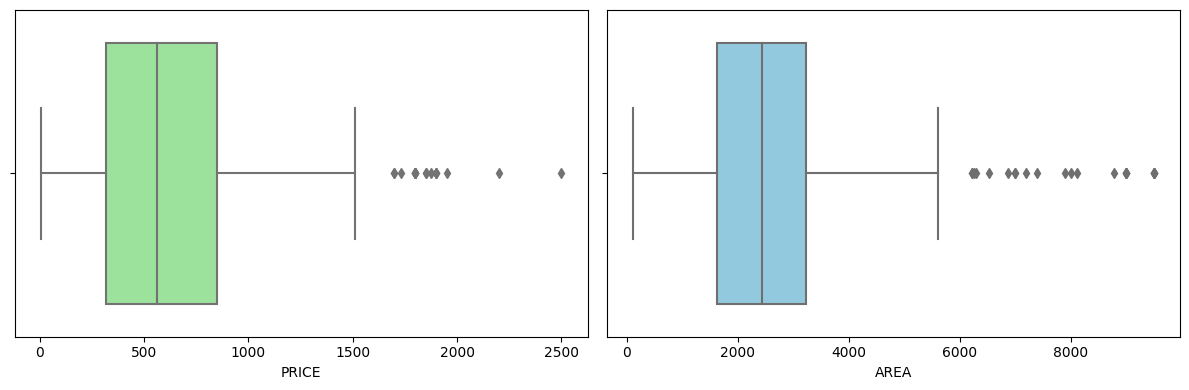

In [70]:
ind_house = ind_house.query("PRICE<3000 and AREA<@C.TEN_K")
print(ind_house.shape)
boxplot(ind_house)

In [71]:
ind_house[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,433.000000,433.000000,4.330000e+02
mean,640.837182,2756.810624,1.990040e+05
std,422.161487,1780.288040,3.115987e+05
min,6.000000,122.000000,1.200000e+03
25%,320.000000,1620.000000,1.097850e+05
50%,560.000000,2430.000000,1.955880e+05
75%,850.000000,3240.000000,2.750000e+05
max,2500.000000,9500.000000,6.250000e+06


### **Summary** - _Rental_ Independent Houses

- Data Length: **430**
- PRICE range: **6L to 25Cr**
- AREA range: **122 to 9.5k sq.ft.**

## Merge rent_apartment and rent_ind_house

(2065, 10)


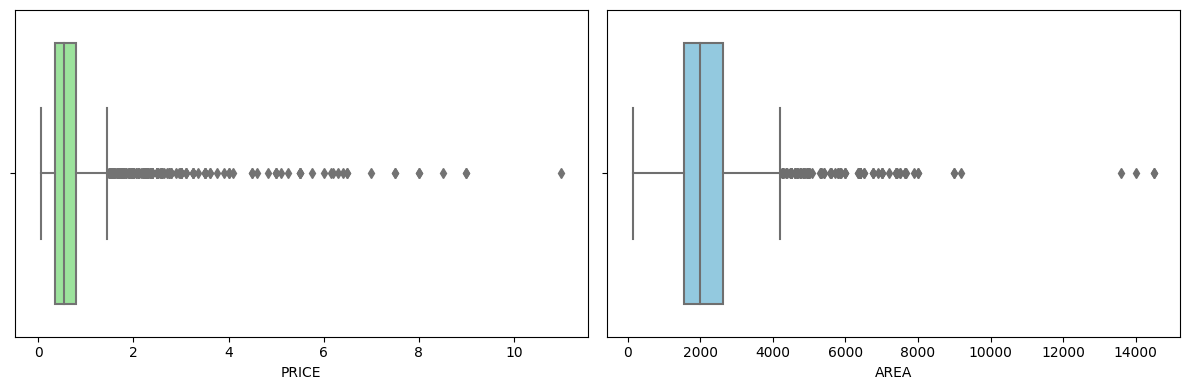

In [72]:
rent_apartment_house = pd.concat([rent_res_apartment, rent_ind_house], ignore_index=True)
print(rent_apartment_house.shape)
boxplot(rent_apartment_house)

In [73]:
rent_apartment_house.query("PRICE>10 or AREA>@C.TEN_K")

,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,BEDROOM_NUM,PROP_NAME
1979,https://99acres.com/R70716848,gurgaon,11.00,2200.0,4500.0,36 bedroom house in sector 46 gurgaon,guest house for lease 36 rooms ultra luxury fu...,independent house/villa,36.0,rwa sector 46
2041,https://99acres.com/B70761772,gurgaon,1.75,12.0,14000.0,34 bedroom house in sohna,indipendent building - saprate 17 1bhk flats -...,independent house/villa,34.0,NaN
2054,https://99acres.com/X70299076,gurgaon,2.95,21.0,13600.0,8 bedroom house in sector 41 gurgaon,available ultra luxury villas for lease it's 8...,independent house/villa,8.0,unitech south city heights
2058,https://99acres.com/V70239970,gurgaon,3.25,22.0,14500.0,8 bedroom house in sushant lok phase 1,available brand new luxury villas 8 bedroom wi...,independent house/villa,8.0,silverglades hightown residences
2064,https://99acres.com/O70399122,gurgaon,3.60,24.0,14500.0,12 bedroom house in dlf phase 2,available very beautiful indepedent villas hou...,independent house/villa,12.0,NaN


(2060, 10)


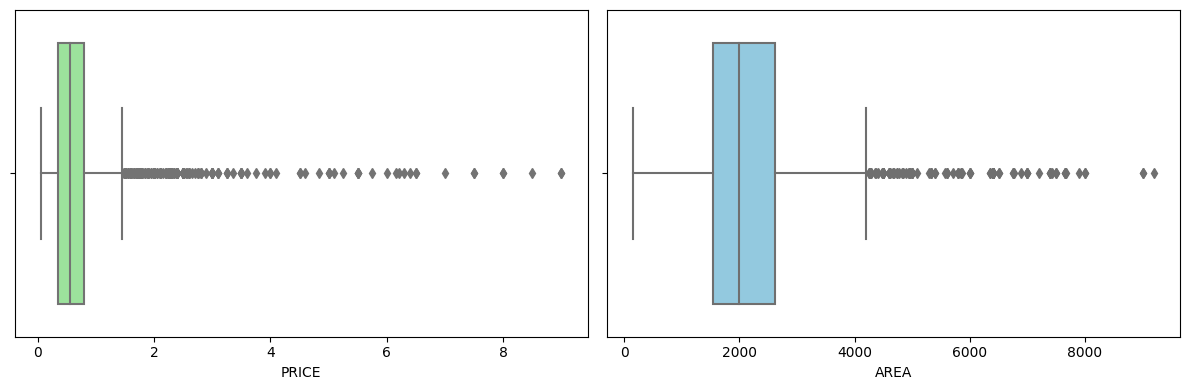

In [74]:
rent_apartment_house = rent_apartment_house.query("PRICE<10 and AREA<@C.TEN_K")
print(rent_apartment_house.shape)
boxplot(rent_apartment_house)

In [75]:
rent_apartment_house[imp_cols].describe()

,PRICE,AREA,PRICE_SQFT
count,2060.000000,2060.000000,2060.000000
mean,0.787513,2223.694175,49.989806
std,0.884590,1168.309579,91.320135
min,0.055000,160.000000,7.000000
25%,0.350000,1550.000000,21.000000
50%,0.550000,2000.000000,29.000000
75%,0.800000,2616.250000,41.000000
max,9.000000,9198.000000,1424.000000


## PostProcessing

In [76]:
print(f"{res_apartment.shape = }")
print()
print(f"{ind_floor.shape = }")
print(f"{rent_ind_floor.shape = }")
print()
print(f"{res_land.shape = }")
print()
print(f"{ind_house.shape = }")
print()
print(f"{rent_apartment_house.shape = }")

res_apartment.shape = (4049, 10)

ind_floor.shape = (1816, 10)
rent_ind_floor.shape = (642, 10)

res_land.shape = (987, 10)

ind_house.shape = (433, 10)

rent_apartment_house.shape = (2060, 10)


### Export datasets

In [77]:
from pathlib import Path


dir_path = Path("data/Gurgaon")
dir_path.mkdir(parents=True, exist_ok=True)

fp_mapping = {
    dir_path / "res_apartment.csv": res_apartment,
    dir_path / "ind_floor.csv": ind_floor,
    dir_path / "rent_ind_floor.csv": rent_ind_floor,
    dir_path / "res_land.csv": res_land,
    dir_path / "ind_house.csv": ind_house,
    dir_path / "rent_apartment_house.csv": rent_apartment_house,
}

In [85]:
common_cols = [
    "AREA",
    "BEDROOM_NUM",
    "CITY",
    "DESCRIPTION",
    "PRICE",
    "PRICE_SQFT",
    "PROPERTY_TYPE",
    "PROP_HEADING",
    "PROP_NAME",
]

In [87]:
for fp, dataset in fp_mapping.items():
    dataset["PROP_ID"] = dataset["PROP_ID"].str.removeprefix("https://99acres.com/").str.lower()
    dataset.drop(columns=common_cols).merge(main_df, how="left", on="PROP_ID").to_csv(
        fp, index=False
    )